# Blinkit Data Analysis & Forecasting Capstone Project 

This project covers complete end-to-end data analysis using Python for the Blinkit e-commerce business.

### Project Sections:
1. Exploratory Data Analysis (EDA)
2. Sentiment Analysis from Customer Feedback
3. Delivery Time Prediction (Regression)
4. Customer Segmentation (Clustering)
5. Sales Forecasting (Time Series)



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [19]:
import os
import pandas as pd

# Set folder path where all Blinkit CSV files are stored
folder_path = r"D:/PythonFiles/blinkit"

# Dictionary to store all dataframes
dataframes = {}

# Manually define all expected file names (remove .csv to use as keys)
csv_files = [
    "blinkit_customer_feedback",
    "blinkit_customers",
    "blinkit_delivery_performance",
    "blinkit_inventory",
    "blinkit_inventoryNew",
    "blinkit_marketing_performance",
    "blinkit_order_items",
    "blinkit_orders",
    "blinkit_products",
    "blinkit_customer_feedback - Copy"
]

# Load each file into the dictionary
for file_name in csv_files:
    full_path = os.path.join(folder_path, file_name + ".csv")
    try:
        dataframes[file_name] = pd.read_csv(full_path)
        print(f"✅ Loaded: {file_name} ({dataframes[file_name].shape[0]} rows, {dataframes[file_name].shape[1]} columns)")
    except Exception as e:
        print(f"❌ Failed to load {file_name}: {e}")


✅ Loaded: blinkit_customer_feedback (5000 rows, 8 columns)
✅ Loaded: blinkit_customers (2500 rows, 11 columns)
✅ Loaded: blinkit_delivery_performance (5000 rows, 8 columns)
✅ Loaded: blinkit_inventory (75172 rows, 4 columns)
✅ Loaded: blinkit_inventoryNew (18105 rows, 4 columns)
✅ Loaded: blinkit_marketing_performance (5400 rows, 11 columns)
✅ Loaded: blinkit_order_items (5000 rows, 4 columns)
✅ Loaded: blinkit_orders (5000 rows, 10 columns)
✅ Loaded: blinkit_products (268 rows, 10 columns)
✅ Loaded: blinkit_customer_feedback - Copy (5000 rows, 8 columns)


## Part 3.1: Exploratory Data Analysis (EDA)

###  Objective:
Explore the Blinkit datasets to understand key metrics and identify patterns in customer orders and delivery.

###  Key Tasks:
- Load and clean the dataset (handle nulls, date formats, and duplicates).
- Perform descriptive statistics on:
  - `order_total` (₹)
  - `delivery_time_minutes`
- Visualize:
  - Distribution of order values using histograms.
  - Distribution of delivery times.
  - Customer segment distribution using bar plots.

###  Tools & Libraries:
- `pandas`
- `matplotlib`
- `seaborn`


In [20]:
# ✅ Assign individual DataFrames to variables
orders = dataframes['blinkit_orders']
delivery = dataframes['blinkit_delivery_performance']
customers = dataframes['blinkit_customers']

In [21]:
# ✅ Step 2: Convert Dates
orders['order_date'] = pd.to_datetime(orders['order_date'])
delivery['promised_time'] = pd.to_datetime(delivery['promised_time'])
delivery['actual_time'] = pd.to_datetime(delivery['actual_time'])

In [22]:
merged = pd.merge(orders, delivery, on='order_id', how='inner')
full_data = pd.merge(merged, customers, on='customer_id', how='left')


In [23]:
print("Order Total Description:")
print(orders['order_total'].describe())

print("\nDelivery Time (Minutes) Description:")
print(full_data['delivery_time_minutes'].describe())

print("\nCustomer Segment Distribution:")
print(customers['customer_segment'].value_counts())


Order Total Description:
count    5000.00000
mean     2201.86170
std      1303.02438
min        13.25000
25%      1086.21500
50%      2100.69000
75%      3156.88250
max      6721.46000
Name: order_total, dtype: float64

Delivery Time (Minutes) Description:
count    5000.000000
mean        4.443000
std         8.063929
min        -5.000000
25%        -1.000000
50%         2.000000
75%         8.000000
max        30.000000
Name: delivery_time_minutes, dtype: float64

Customer Segment Distribution:
customer_segment
Regular     639
Premium     633
New         628
Inactive    600
Name: count, dtype: int64


In [24]:
orders = pd.read_csv("D:/PythonFiles/blinkit/blinkit_orders.csv")
orders.head()


,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [26]:
orders.describe()

,order_id,customer_id,order_total,delivery_partner_id,store_id
count,5.000000e+03,5.000000e+03,5000.00000,5000.000000,5000.000000
mean,5.029129e+09,5.009685e+07,2201.86170,50050.318200,4999.689000
std,2.863533e+09,2.919082e+07,1303.02438,28802.276922,2886.089242
min,6.046500e+04,3.181300e+04,13.25000,43.000000,1.000000
25%,2.531421e+09,2.404314e+07,1086.21500,24928.500000,2509.250000
50%,5.074378e+09,4.997808e+07,2100.69000,50262.500000,4987.000000
75%,7.488579e+09,7.621215e+07,3156.88250,74478.250000,7500.750000
max,9.998298e+09,9.989390e+07,6721.46000,99968.000000,9995.000000


In [27]:
orders.isnull().sum()

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64

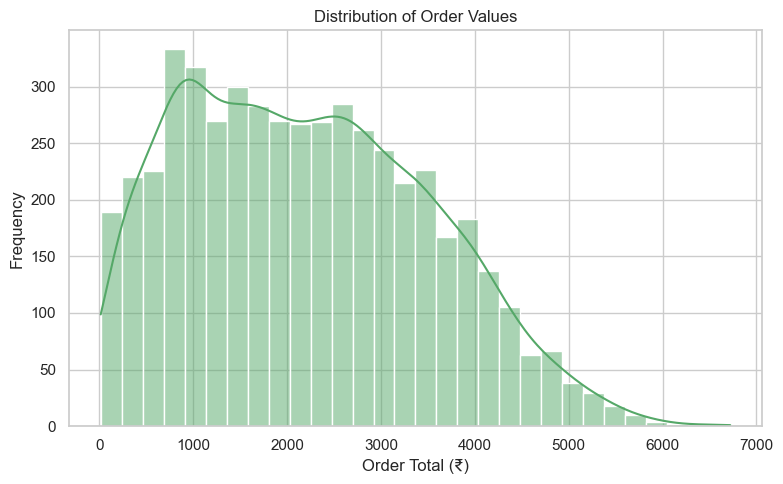

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(orders['order_total'], kde=True, color='g', bins=30)
plt.title("Distribution of Order Values")
plt.xlabel("Order Total (₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\mdpra\AppData\Local\Temp\ipykernel_25092\3779072850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="customer_segment", palette="viridis")


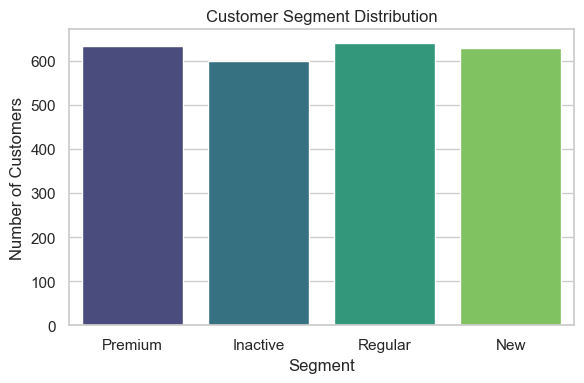

In [29]:
# ✅ Step 6: Visualization – Customer Segment Count
plt.figure(figsize=(6, 4))
sns.countplot(data=customers, x="customer_segment", palette="viridis")
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

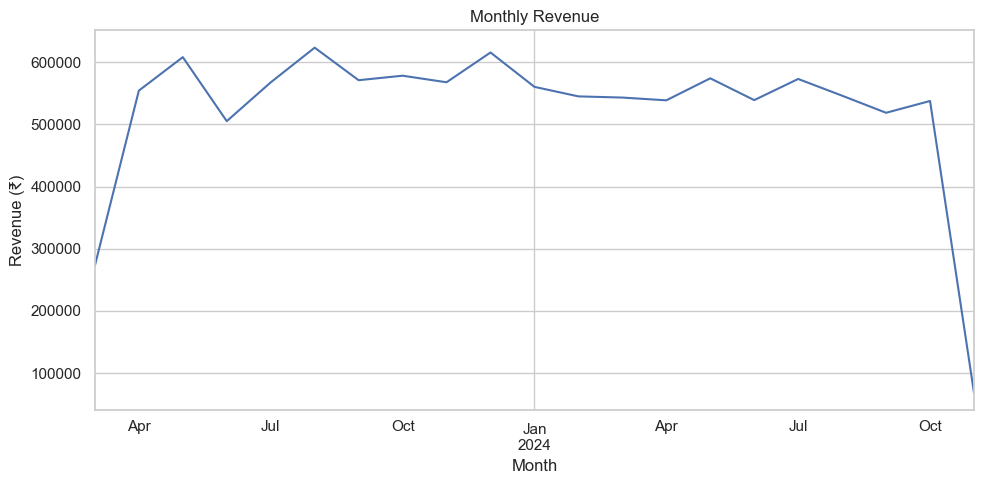

In [30]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Monthly revenue
monthly_revenue = orders.resample('M', on='order_date')['order_total'].sum()

plt.figure(figsize=(10, 5))
monthly_revenue.plot()
plt.title("Monthly Revenue")
plt.ylabel("Revenue (₹)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Part 3.2: Sentiment Analysis & Text Processing

###  Objective:
Understand customer satisfaction by analyzing text feedback and sentiment scores.

###  Key Tasks:
- Clean text (`feedback_text`) using basic preprocessing (lowercase, remove punctuation, stopwords).
- Generate WordCloud for frequently used terms.
- Count sentiment types (`Positive`, `Neutral`, `Negative`).
- Correlate sentiment with:
  - Average order value
  - Average delivery delay

###  Tools & Libraries:
- `pandas`, `re`, `nltk`
- `wordcloud`, `matplotlib`, `seaborn`


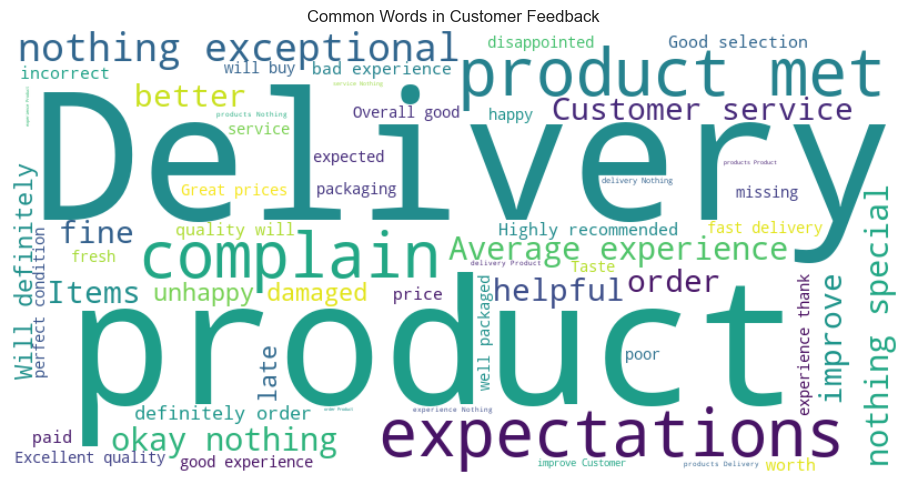

In [31]:
# Load Feedback Data
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feedback = pd.read_csv("D:/PythonFiles/blinkit/blinkit_customer_feedback.csv")

# Remove nulls and join all feedback
text = ' '.join(feedback['feedback_text'].dropna().astype(str))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Customer Feedback')
plt.tight_layout()
plt.show()


In [32]:
# Merge feedback and orders
merged = pd.merge(feedback, orders, on='order_id', how='left')

# Merge delivery info
merged = pd.merge(merged, delivery[['order_id', 'promised_time', 'actual_time']], on='order_id', how='left')

# Convert to datetime
merged['promised_time'] = pd.to_datetime(merged['promised_time'])
merged['actual_time'] = pd.to_datetime(merged['actual_time'])

# Calculate delivery time in minutes
merged['delivery_time_minutes'] = (merged['actual_time'] - merged['promised_time']).dt.total_seconds() / 60


In [33]:
sentiment_analysis = merged.groupby('sentiment').agg({
    'order_total': 'mean',
    'delivery_time_minutes': 'mean'
}).reset_index()


C:\Users\mdpra\AppData\Local\Temp\ipykernel_25092\512251965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sentiment_analysis, x='sentiment', y='order_total', palette=colors)


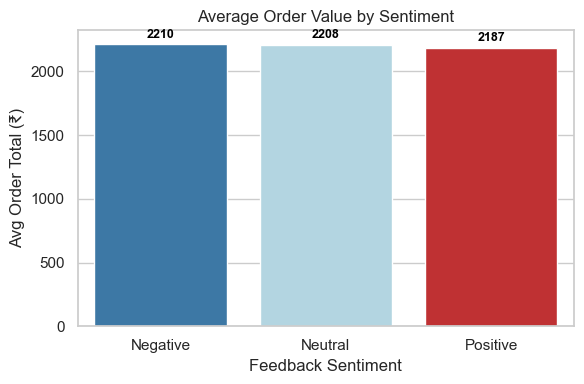

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set better & darker color palette
colors = ['#2c7bb6', '#abd9e9', '#d7191c']  # Dark Blue, Light Blue, Red

plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=sentiment_analysis, x='sentiment', y='order_total', palette=colors)

# Add value labels on top of each bar
for index, row in sentiment_analysis.iterrows():
    barplot.text(index, row.order_total + 50, f"{row.order_total:.0f}", color='black', ha="center", fontweight='bold',size =9)

plt.title("Average Order Value by Sentiment", fontsize=12)
plt.ylabel("Avg Order Total (₹)", fontsize=12)
plt.xlabel("Feedback Sentiment", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\mdpra\AppData\Local\Temp\ipykernel_11700\4067665701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis, x='sentiment', y='delivery_time_minutes', palette='coolwarm')


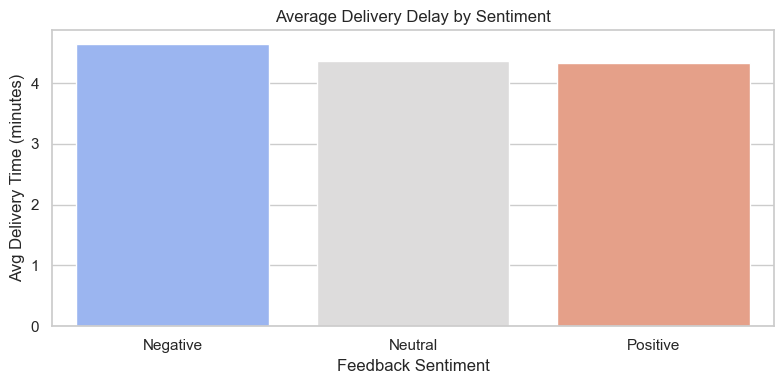

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(data=sentiment_analysis, x='sentiment', y='delivery_time_minutes', palette='coolwarm')
plt.title("Average Delivery Delay by Sentiment")
plt.ylabel("Avg Delivery Time (minutes)")
plt.xlabel("Feedback Sentiment")
plt.tight_layout()
plt.show()


C:\Users\mdpra\AppData\Local\Temp\ipykernel_11700\2902065230.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


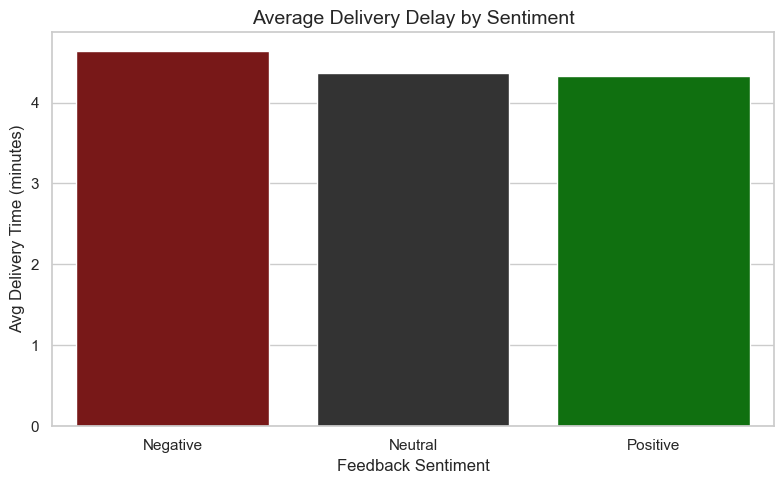

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom dark color palette (Positive = Green, Neutral = Black, Negative = Red)
custom_colors = {
    'Positive': '#008000',   # Dark Green
    'Neutral': '#333333',    # Dark Grey (Black-ish)
    'Negative': '#880808'    # Firebrick Red
}

# Map sentiment to color
palette = [custom_colors[sentiment] for sentiment in sentiment_analysis['sentiment']]

plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=sentiment_analysis,
    x='sentiment',
    y='delivery_time_minutes',
    palette=palette
)

plt.title("Average Delivery Delay by Sentiment", fontsize=14)
plt.ylabel("Avg Delivery Time (minutes)", fontsize=12)
plt.xlabel("Feedback Sentiment", fontsize=12)
plt.tight_layout()
plt.show()


##  Part 3.3: Delivery Time Prediction (Regression)

###  Objective:
Build a regression model to predict delivery time based on delivery distance and other time-related factors.

###  Features Used:
- `distance_km`
- `promised_time` (converted to hour, weekday)
- `delivery_partner_id`

###  Key Tasks:
- Convert `promised_time` to features
- Prepare training/testing data
- Fit Linear Regression Model
- Evaluate model using:
  - RMSE (Root Mean Squared Error)
  - R² Score
- Visualize actual vs predicted values

###  Tools & Libraries:
- `scikit-learn (LinearRegression)`
- `train_test_split`
- `mean_squared_error`, `r2_score`


In [16]:
# Make a copy of delivery data
model_data = delivery[['delivery_time_minutes', 'distance_km', 'promised_time', 'delivery_partner_id']].copy()

# Drop nulls
model_data.dropna(inplace=True)

# Extract hour and weekday from promised_time
model_data['promised_hour'] = pd.to_datetime(model_data['promised_time']).dt.hour
model_data['promised_weekday'] = pd.to_datetime(model_data['promised_time']).dt.weekday


In [17]:
# Convert delivery_partner_id to categorical code
model_data['delivery_partner_id'] = model_data['delivery_partner_id'].astype('category').cat.codes


In [18]:
from sklearn.model_selection import train_test_split

X = model_data[['distance_km', 'promised_hour', 'promised_weekday', 'delivery_partner_id']]  # features
y = model_data['delivery_time_minutes']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4000, 4)
y_train shape: (4000,)


In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Mean Squared Error:", round(mse, 2))
print("📈 R² Score:", round(r2, 2))


📉 Mean Squared Error: 61.77
📈 R² Score: -0.0


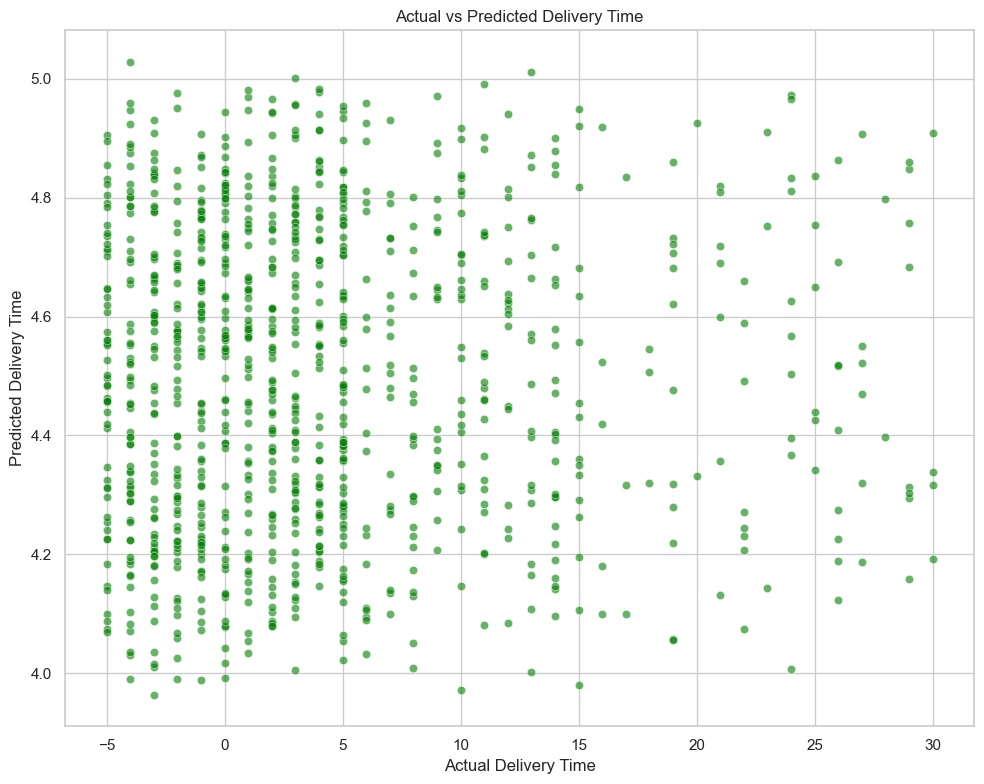

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.tight_layout()
plt.show()


In [23]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)


               Feature  Coefficient
0          distance_km     0.006578
1        promised_hour    -0.009878
2     promised_weekday    -0.000373
3  delivery_partner_id     0.000169


# Part 3 (B) — Model Evaluation & Feature Interpretation


In this step, we evaluate the performance of our linear regression model using metrics like:
- Mean Squared Error (MSE)
- R² Score

We also examine which features have the most influence on delivery time using the learned coefficients of the model.


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Mean Squared Error (MSE):", round(mse, 2))
print("📈 R² Score:", round(r2, 2))


📉 Mean Squared Error (MSE): 61.77
📈 R² Score: -0.0


In [38]:
# Re-create model_data (same as you did earlier)
model_data = delivery[['delivery_time_minutes', 'distance_km', 'promised_time', 'delivery_partner_id']].copy()

# Drop nulls
model_data.dropna(inplace=True)

# Extract hour and weekday from promised_time
model_data['promised_time'] = pd.to_datetime(model_data['promised_time'])
model_data['promised_hour'] = model_data['promised_time'].dt.hour
model_data['promised_weekday'] = model_data['promised_time'].dt.weekday

# Convert delivery_partner_id to category codes
model_data['delivery_partner_id'] = model_data['delivery_partner_id'].astype('category').cat.codes


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Step 1: Prepare Data (already done by you earlier)
X = model_data[['distance_km', 'promised_hour', 'promised_weekday', 'delivery_partner_id']]
y = model_data['delivery_time_minutes']

# ✅ Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 3: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Step 4: Make Predictions
y_pred_rf = rf_model.predict(X_test)

# ✅ Step 5: Evaluate Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Results:")
print("📉 Mean Squared Error:", round(mse_rf, 2))
print("📈 R² Score:", round(r2_rf, 2))


🌲 Random Forest Results:
📉 Mean Squared Error: 68.16
📈 R² Score: -0.1


### Model Interpretation:
- A **lower MSE** indicates better prediction accuracy.
- An **R² Score close to 1** means the model explains most of the variance in delivery time.


In [25]:
# Show coefficients of each feature
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df


,Feature,Coefficient
1,promised_hour,-0.009878
0,distance_km,0.006578
2,promised_weekday,-0.000373
3,delivery_partner_id,0.000169


C:\Users\mdpra\AppData\Local\Temp\ipykernel_11700\539792437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='Greens')


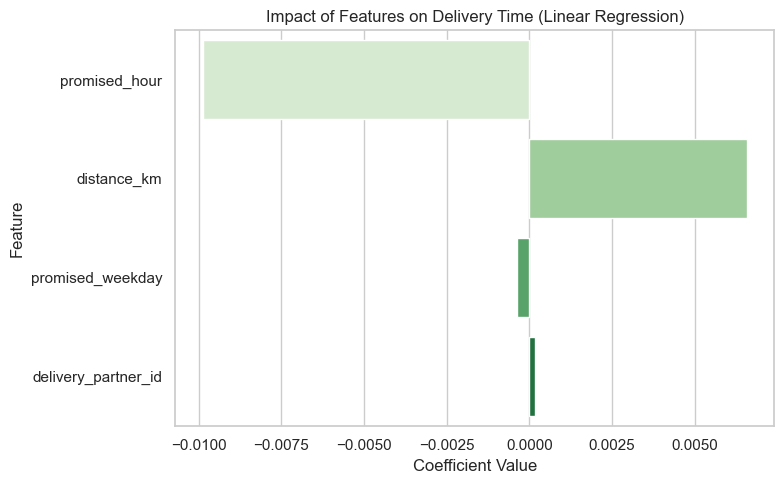

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='Greens')
plt.title("Impact of Features on Delivery Time (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


##  Part 3.4: Customer Segmentation (Clustering)

###  Objective:
Use clustering to segment customers based on order behavior for targeted marketing and retention strategies.

###  Features Used:
- `total_orders`
- `avg_order_value`
- `customer_segment` (encoded)

###  Key Tasks:
- Scale the data
- Encode customer segment
- Use KMeans clustering
- Visualize clusters using scatter plot

###  Tools & Libraries:
- `scikit-learn (KMeans)`
- `MinMaxScaler`, `LabelEncoder`
- `seaborn`, `matplotlib`


In [27]:
customers = pd.read_csv("D:/PythonFiles/blinkit/blinkit_customers.csv")
customers.head()


,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [28]:
clustering_data = customers[['total_orders', 'avg_order_value']].copy()
clustering_data.dropna(inplace=True)


In [29]:
customers.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


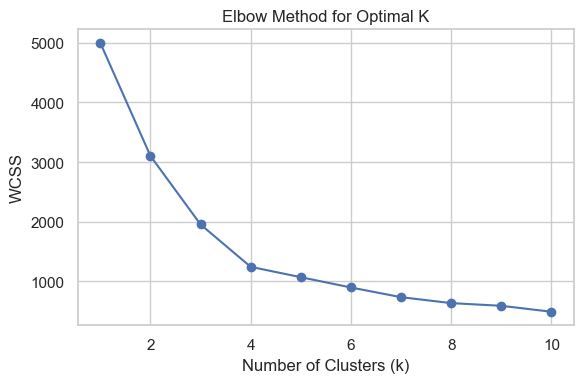

In [31]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()


In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)
customers['cluster'] = kmeans.fit_predict(scaled_data)


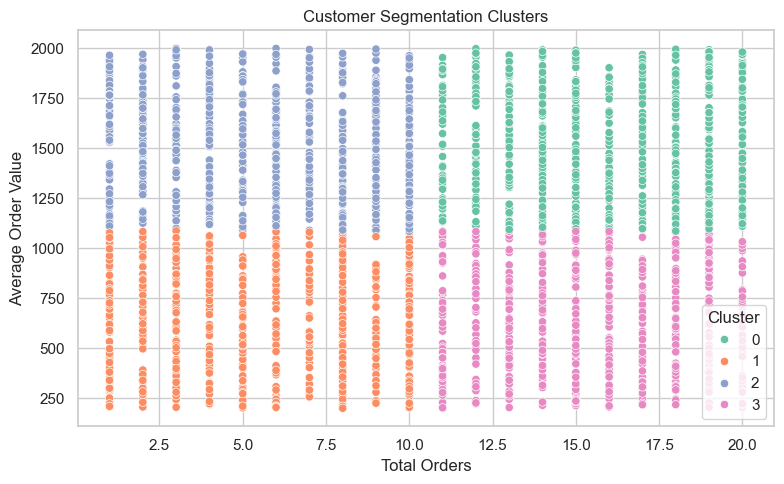

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=customers, x='total_orders', y='avg_order_value', hue='cluster', palette='Set2')
plt.title("Customer Segmentation Clusters")
plt.xlabel("Total Orders")
plt.ylabel("Average Order Value")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [34]:
customers.groupby('cluster')[['total_orders', 'avg_order_value']].mean()


,total_orders,avg_order_value
cluster,,
0,15.707621,1543.805101
1,5.453526,637.278782
2,5.659443,1543.322616
3,15.451448,627.980477


## Part 5: Sales Forecasting (Time Series)

### Objective:
Forecast revenue/order totals for the next quarter.

### Steps:
- Convert `order_date` to datetime
- Group by month and calculate total revenue
- Perform ADF test to check stationarity
- Fit SARIMAX/ARIMA model
- Forecast next 3 months
- Plot forecast with confidence interval

###  Tools:
- `pandas` for resampling and grouping
- `statsmodels.tsa.statespace.SARIMAX`
- `matplotlib` for plotting

---

## Final Outcome:
- Actionable insights from feedback
- Accurate delivery time prediction
- Customer segmentation for marketing
- Future sales forecast for planning


In [35]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")


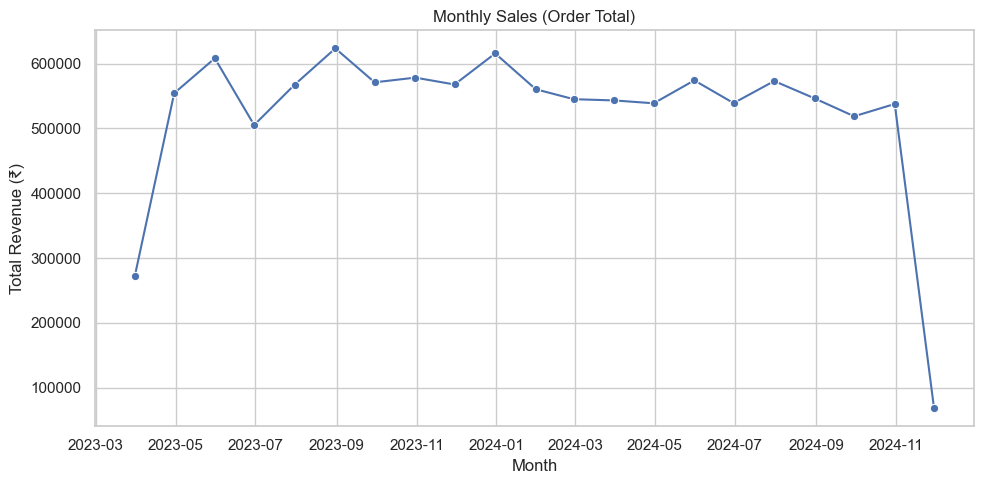

In [46]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='order_total', marker='o')
plt.title("Monthly Sales (Order Total)")
plt.ylabel("Total Revenue (₹)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
# Step 2: Convert order_date to datetime format (very important for time series)
orders['order_date'] = pd.to_datetime(orders['order_date'])


In [48]:
# Step 3: Group by Month and Get Monthly Sales
monthly_sales = orders.groupby(pd.Grouper(key='order_date', freq='M')).sum(numeric_only=True)[['order_total']]

# Optional: View first few rows
monthly_sales.head()


,order_total
order_date,
2023-03-31,272878.96
2023-04-30,554344.77
2023-05-31,608213.54
2023-06-30,505227.66
2023-07-31,567639.91


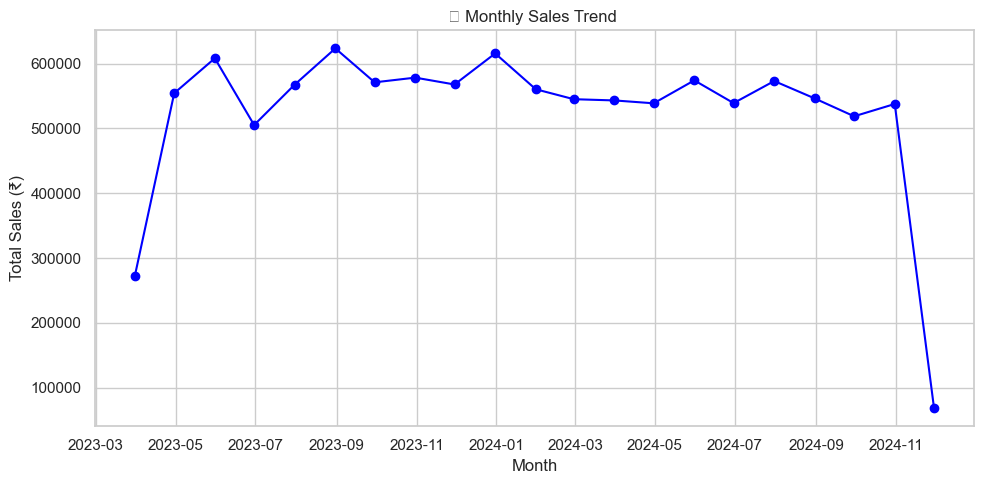

In [49]:
# Step 4: Plot Historical Sales
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales['order_total'], marker='o', linestyle='-', color='blue')
plt.title("📈 Monthly Sales Trend ")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Step 5: Build SARIMAX Time Series Model
model = SARIMAX(monthly_sales['order_total'], 
                order=(1, 2, 1), 
                seasonal_order=(1, 1, 1, 12))

results = model.fit(disp=False)


In [51]:
# Step 6: Forecast for Next 3 Months (1 Quarter)
forecast = results.get_forecast(steps=3)
forecast_df = forecast.conf_int()
forecast_df['Predicted Sales'] = forecast.predicted_mean
forecast_df.index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), 
                                  periods=3, freq='MS')

forecast_df


,lower order_total,upper order_total,Predicted Sales
2025-01-01,-1.274955e+06,-472588.901007,-8.737719e+05
2025-02-01,-3.573788e+06,-852641.290584,-2.213215e+06
2025-03-01,-6.523268e+06,-865393.133504,-3.694331e+06


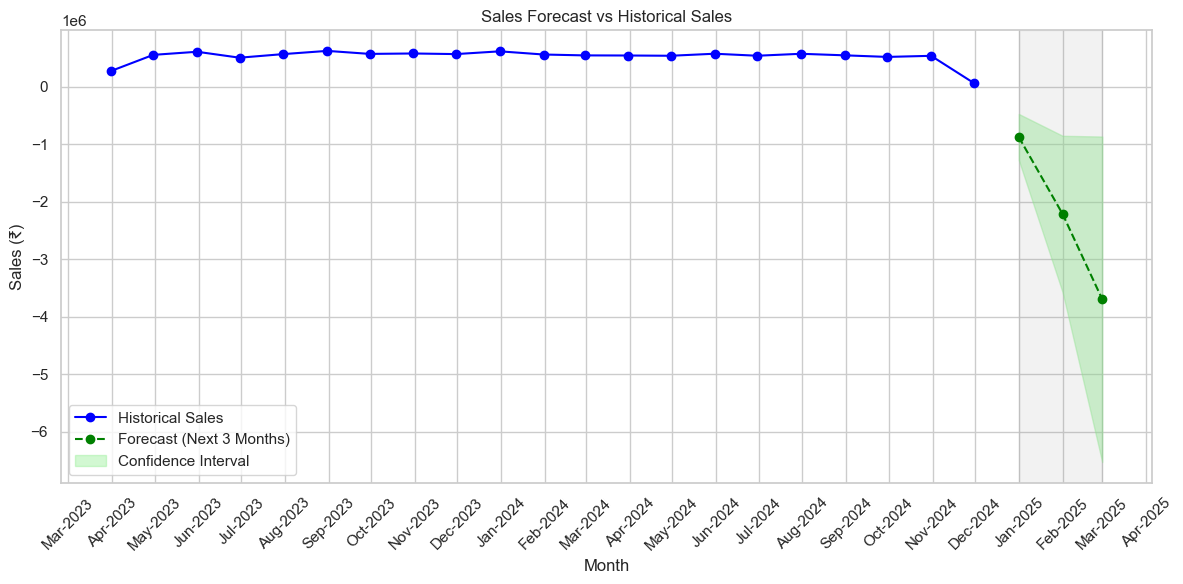

In [52]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Plot historical sales
plt.plot(monthly_sales.index, monthly_sales['order_total'], label='Historical Sales', color='blue', marker='o')

# Plot forecast
plt.plot(forecast_df.index, forecast_df['Predicted Sales'], label='Forecast (Next 3 Months)', color='green', marker='o', linestyle='--')

# Confidence interval shaded area
plt.fill_between(forecast_df.index,
                 forecast_df['lower order_total'],
                 forecast_df['upper order_total'],
                 color='lightgreen', alpha=0.4, label='Confidence Interval')

# Highlight forecast region background
plt.axvspan(forecast_df.index[0], forecast_df.index[-1], color='gray', alpha=0.1)

# Format x-axis as month/year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.title("Sales Forecast vs Historical Sales")
plt.xlabel("Month")
plt.ylabel("Sales (₹)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
# Re-create model_data (same as you did earlier)
model_data = delivery[['delivery_time_minutes', 'distance_km', 'promised_time', 'delivery_partner_id']].copy()

# Drop nulls
model_data.dropna(inplace=True)

# Extract hour and weekday from promised_time
model_data['promised_time'] = pd.to_datetime(model_data['promised_time'])
model_data['promised_hour'] = model_data['promised_time'].dt.hour
model_data['promised_weekday'] = model_data['promised_time'].dt.weekday

# Convert delivery_partner_id to category codes
model_data['delivery_partner_id'] = model_data['delivery_partner_id'].astype('category').cat.codes
